# TD4 Advanced Regressions

#### Following this beautiful publication on Kaggle competition : 
https://www.kaggle.com/shaygu/house-prices-begginer-top-7/notebook

In [1]:
import github_command as gt

In [35]:
gt.push(file_to_transfer="TD4_Advanced_Regressions.ipynb", 
        message="detect outliers", 
        repos="TDs_ESILV")

In [52]:
gt.push(file_to_transfer="TD4_data.ipynb", 
        message="changed files - needed for regression in TD4", 
        repos="TDs_ESILV")

# Table of contents
1. [Importing libraries](#libraries)
2. [Loading and querying data](#data loading)

## Libraries <a name='libraries'/>

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings messages in iPython

import os # os functions for files/directory manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data viz
import seaborn as sns # data viz
import numpy as np # vecotrized function + data manipulation
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax # for skewness
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, Image
%matplotlib inline

In [4]:
pd.set_option('display.float_format', 
              lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [5]:
if not os.path.exists("TD4_data/"):
    os.mkdir("TD4_data/")

In [6]:
os.listdir("TD4_data")

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']

## Data Loading and Querying <a name="data loading" />

In [12]:
# Read files
train = pd.read_csv("./TD4_data/train.csv")
test  = pd.read_csv("./TD4_data/test.csv")

In [13]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [14]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id",  axis = 1, inplace = True)

In [36]:
plt.rcParams["figure.figsize"] = 20,15

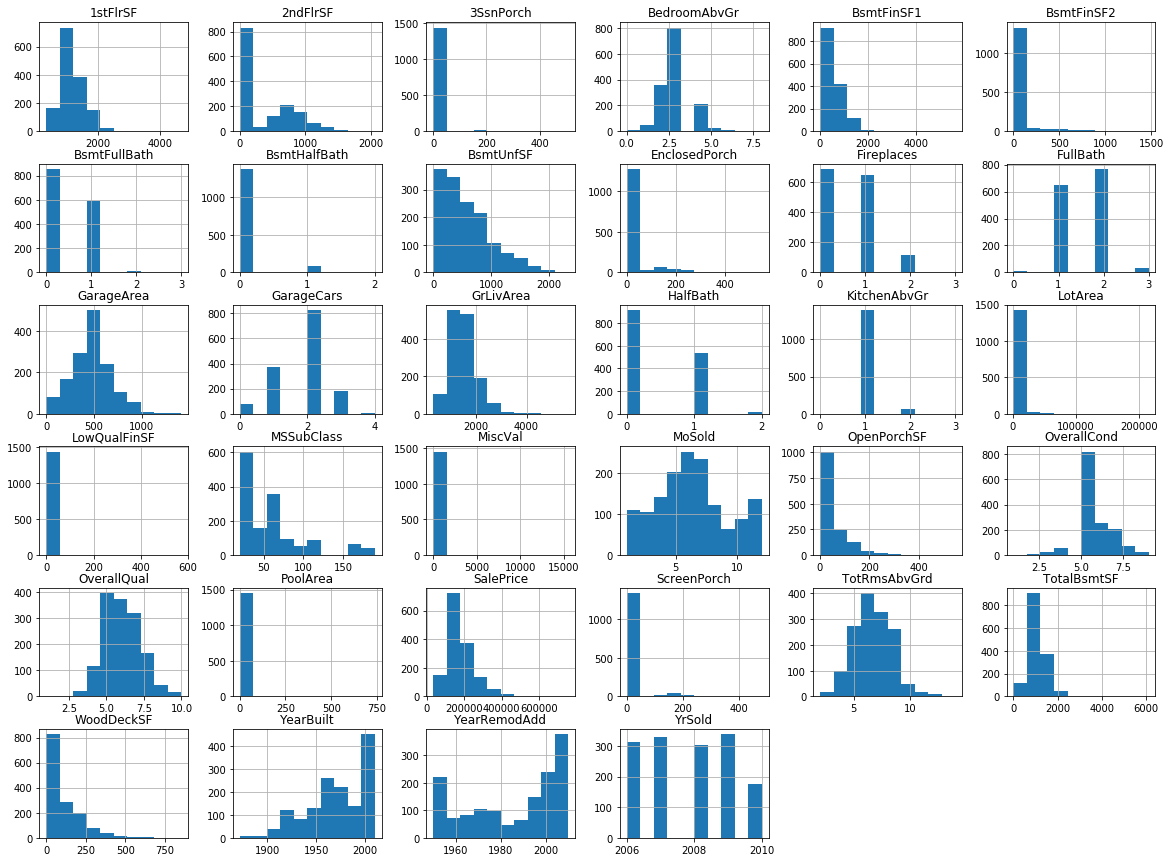

In [40]:
_fig = train[numerical_columns].hist()

In [43]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [44]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
train.shape, test.shape

((1460, 80), (1459, 79))

#### colonne d'intérêt <=> dependent variable

In [46]:
set(train.columns) ^ set(test.columns)

{'SalePrice'}

## Outlier detection

Énumérer les outliers comme deviant de ***N*** standard deviation vis-à-vis de la moyenne.

Est-ce que cela fait sens ? 

In [17]:
numerical_columns = train.dtypes[train.dtypes=='int64'].index

In [18]:
def find_outlier(col, number_stds):
    try:
        return [ val for val in col if np.abs(val) > number_stds * np.std(col) ]
    except:
        return 'error'

In [19]:
def indices_outlier(col):
    return list(col[col].index.values)

In [20]:
train[numerical_columns].apply(find_outlier, number_stds=7).to_frame()

,0
MSSubClass,[]
LotArea,"[159000, 215245, 164660, 70761, 115149]"
OverallQual,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
OverallCond,"[8, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, ..."
YearBuilt,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197..."
YearRemodAdd,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197..."
BsmtFinSF1,[5644]
BsmtFinSF2,[1474]
BsmtUnfSF,[]
TotalBsmtSF,"[3206, 3094, 3200, 3138, 6110]"


## Data skewness

* assymétrie <=> skewness
* a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* third standardized moment

In [ ]:
Image(filename="")